# Data by Max Hinne Visualisation
In this notebook I'm visualising data that has been supplied by Max Hinne.

In [19]:
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns

In [12]:
dpi=60

def print_graph(nodes=None, edges=None, G=None):
  if not isinstance(G, nx.Graph):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
  pos = nx.nx_agraph.graphviz_layout(G, prog='sfdp') # neato, dot, twopi, circo, fdp, nop, wc, acyclic, gvpr, gvcolor, ccomps, sccmap, tred, sfdp, unflatten
  options = {"node_color": "white", "edgecolors": "blue", "font_size":11, "node_size":100}
  fig, axes = plt.subplots(figsize=(10, 10), dpi=dpi)

  nx.draw(G, pos, axes, **options)
  # nx.draw_shell(G,  **options)
  plt.show()

def nodes_sorted_by_degree(graph):
  return [x[0] for x in sorted({n:graph.degree(n) for n in graph.nodes}.items(), key=lambda x:x[1], reverse=True)]
    
def graph_density(arr):
    ranksquared = arr.shape[0]**2
    return len(arr[arr>0])/ranksquared

def prune_to_density(arr, density):
    max_edge = arr.shape[0] * arr.shape[1]
    while graph_density(arr) > density:
        arr[arr==np.min(arr[arr>0])] = 0
    return arr

def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

def preprocess_Hinne(arr, density = 0.1):
    np.fill_diagonal(arr,0)
    arr = np.maximum( arr, arr.transpose())
    if not check_symmetric(arr):
        raise Exception("Matrix not symmetric")
    print("original graph density: ", graph_density(arr))
    arr = prune_to_density(arr, density)
    print("reduced graph density: ", graph_density(arr))
    arr = np.where(arr>0, 1, 0)
    return arr

def sort_matrix_by_indices(labels, matrix):
    order = [x[0] for x in sorted({n:l for n, l in enumerate(labels)}.items(), key=lambda x:x[1], reverse=False)]
    order = np.array(order)
    ordermatrix = np.tile(order, (len(labels), 1))
    matrix_sorted_columns = np.take_along_axis(matrix, ordermatrix, axis=1)
    return sorted(labels), matrix_sorted_columns[order]

## Load & Process Data
In the next cell I'm loading the data and preprocessing it.

In [6]:
data = np.load("HCP/data_hinne.npz")
print("sample id: ", data["ID"][0])
sample = data["SC"][0]
sample = preprocess_Hinne(sample)

sample id:  100307
original graph density:  0.6955681142177276
reduced graph density:  0.09994051160023795


## Print Graph
In the next cell I'm printing the graph representing the structural connectivity using the graphviz layout "sfdp". In this visualisation, we can already start to see a separation between left and right hemisphere.

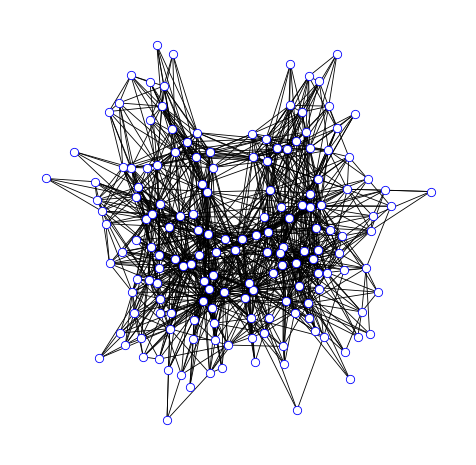

In [7]:
graph = nx.from_numpy_matrix(sample)
print_graph(G=graph)

## Print Original Adjacency Matrix
In this cell I am printing the original adjacency matrix, which also reveals a strong bipartite property (the chessboard pattern).

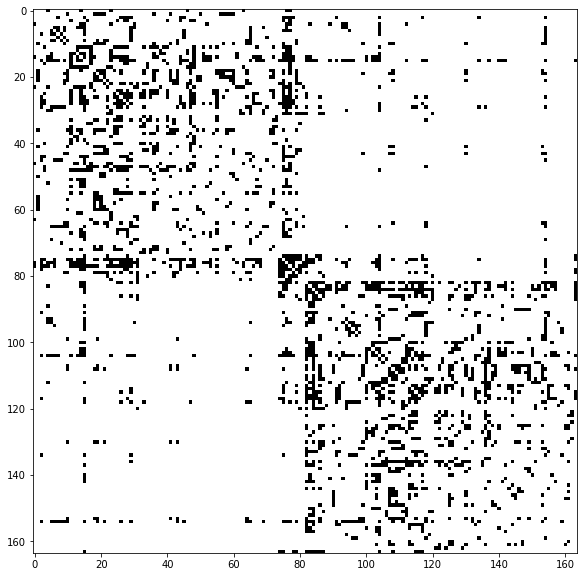

In [9]:
plt.subplots(figsize=(10, 10))
plt.imshow(sample, cmap='Greys', interpolation='none')
plt.show()

## Printing Degree Sorted Adjacency Matrix
In this cell I will print the adjacency matrix but sorted by the degree of the nodes.

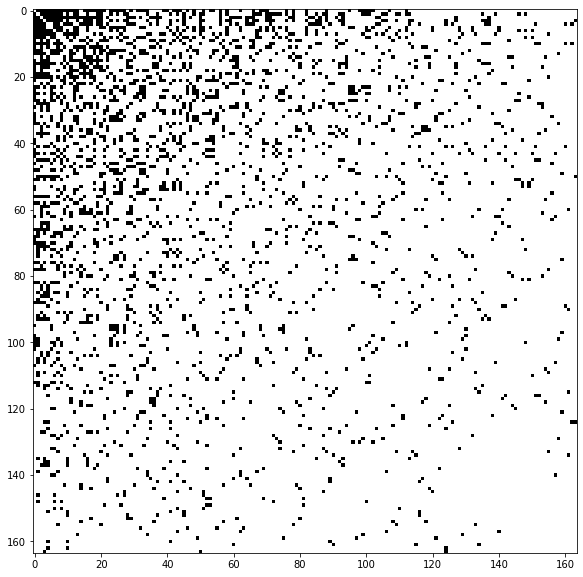

In [10]:
plt.subplots(figsize=(10, 10))
plt.imshow(nx.to_numpy_array(graph, nodelist=nodes_sorted_by_degree(graph)), cmap='Greys', interpolation='none')
plt.show()

## Using Seaborn Clustering
In the next cell I first shuffle the adjacency matrix and visualise that and then cluster it again using seaborn clustering algorithms. This reveals how seaborn can rediscover the bipartite property.

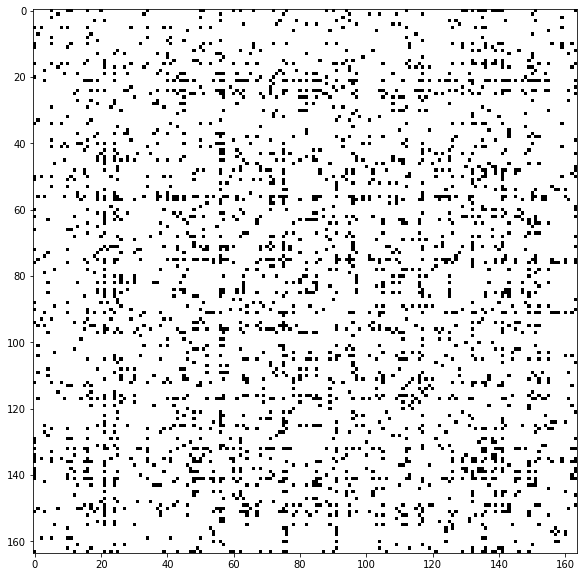

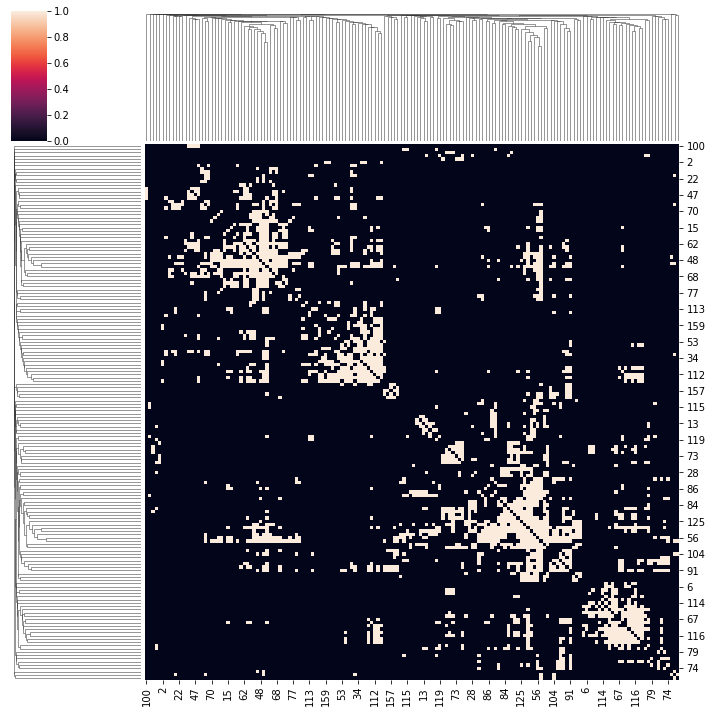

In [21]:
arr = deepcopy(sample)
_, new_arr = sort_matrix_by_indices(random.sample(list(range(len(arr))), k=len(arr)), arr)
plt.subplots(figsize=(10, 10))
plt.imshow(new_arr, cmap='Greys', interpolation='none')
plt.show()
sns.clustermap(new_arr, metric="russellrao")  # correlation, cosine, dice, jensenshannon, kulsinski, russellrao, yule
plt.show()